In [863]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.linear_model import RidgeCV
import seaborn as sns

In [ ]:
##Importing the dataset

In [864]:
data_=pd.read_csv("ToyotaCorolla_.csv",encoding='ANSI')

In [865]:
data_.shape

(1436, 38)

In [866]:
data_new=data_[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [917]:
data_new.isnull().sum() ##Checking for null values

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [868]:
x=data_new[["Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]].values
y=data_new[["Price"]].values

In [869]:
train,test=train_test_split(data_new,test_size=0.2) ##Splitting the data into training and test data

In [870]:
regressor=LinearRegression()

In [918]:
regressor.fit(x,y)

LinearRegression()

In [919]:
regressor.coef_

array([[-1.21658402e+02, -2.08171292e-02,  3.16809058e+01,
        -1.21100301e-01, -1.61664095e+00,  5.94319936e+02,
         3.94908076e+00,  1.69586318e+01]])

In [921]:
regressor.intercept_

array([-5573.10635791])

In [922]:
regressor.score(x,y)

0.8637627463428192

In [923]:
pred_reg=regressor.predict(train.iloc[:,1:]) ##Predicted values

In [924]:
##Applying Ridge regression

In [925]:
RM=Ridge(alpha=0.01,normalize=True)

In [926]:
RM.fit(train.iloc[:,1:],train['Price'])

Ridge(alpha=0.01, normalize=True)

In [927]:
RM.coef_

array([-1.18736798e+02, -1.85385122e-02,  3.86894674e+01, -2.34622903e+00,
       -6.10547258e+00,  6.39724719e+02,  1.04677849e+01,  1.88547637e+01])

In [928]:
RM.intercept_

-5913.533870538804

In [929]:
RM.alpha

0.01

In [930]:
pred_RM=RM.predict(train.iloc[:,1:])

In [931]:
RM.score(train.iloc[:,1:],train['Price'])

0.865928693406145

In [932]:
np.sqrt(np.mean((pred_RM-train.Price)**2))

1333.4952167074641

In [933]:
##Running Ridge regressor on a set of alpha values and observing how the  R-squared,train and test RMSE changes

In [934]:
train_rmse=[]
test_rmse=[]
R_sqrd=[]

In [935]:
alphas= np.arange(0.01,0.012,0.0001)

In [936]:
for i in alphas:
    RM1=Ridge(alpha=i,normalize=True)
    RM1.fit(train.iloc[:,1:],train['Price'])
    R_sqrd.append(RM1.score(train.iloc[:,1:],train['Price']))
    train_rmse.append(np.sqrt(np.mean((RM1.predict(train.iloc[:,1:])-train.Price)**2)))
    test_rmse.append(np.sqrt(np.mean((RM1.predict(test.iloc[:,1:])-test.Price)**2)))

In [937]:
##alpha vs R-squared values

Text(0, 0.5, 'R-squared')

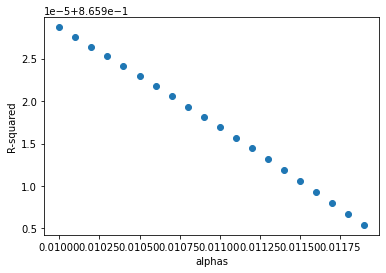

In [938]:
plt.scatter(alphas,R_sqrd)
plt.xlabel("alphas")
plt.ylabel("R-squared")

Text(0, 0.5, 'train_rmse')

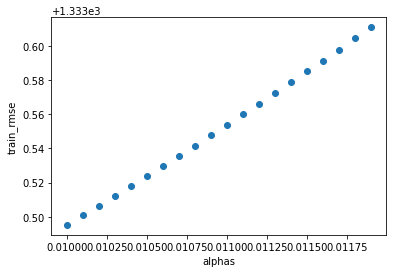

In [939]:
plt.scatter(alphas,train_rmse)
plt.xlabel("alphas")
plt.ylabel("train_rmse")

Text(0, 0.5, 'test_rmse')

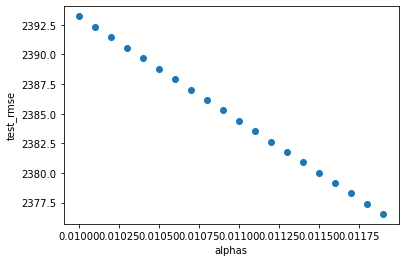

In [940]:
plt.scatter(alphas,test_rmse)
plt.xlabel("alphas")
plt.ylabel("test_rmse")

In [941]:
##Applying Lasso regression

In [942]:
LM=Lasso(alpha=0.001,normalize=True)

In [943]:
LM.fit(train.iloc[:,1:],train['Price'])

Lasso(alpha=0.001, normalize=True)

In [944]:
pred_LM=LM.predict(train.iloc[:,1:])

In [945]:
LM.score(train.iloc[:,1:],train['Price'])

0.8659863032556858

In [946]:
np.sqrt(np.mean((pred_RM-train.Price)**2))

1333.4952167074641

In [947]:
##Running Lasso regressor on a set of alpha values and observing how the  R-squared,train and test RMSE changes

In [948]:
train_rmse=[]
test_rmse=[]
R_sqrd=[]

In [949]:
alphas= np.arange(0.001,0.01,0.001)

In [950]:
for i in alphas:
    LM1=Lasso(alpha=i,normalize=True)
    LM1.fit(train.iloc[:,1:],train['Price'])
    R_sqrd.append(LM1.score(train.iloc[:,1:],train['Price']))
    train_rmse.append(np.sqrt(np.mean((LM1.predict(train.iloc[:,1:])-train.Price)**2)))
    test_rmse.append(np.sqrt(np.mean((LM1.predict(test.iloc[:,1:])-test.Price)**2)))

In [951]:
##alpha vs R-squared values

Text(0, 0.5, 'R-squared')

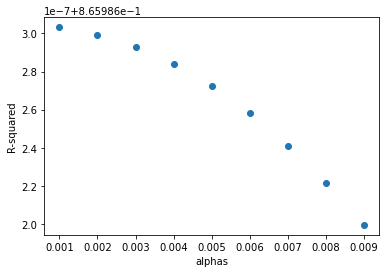

In [952]:
plt.scatter(alphas,R_sqrd)
plt.xlabel("alphas")
plt.ylabel("R-squared")

Text(0, 0.5, 'train_rmse')

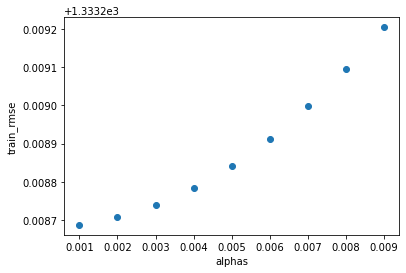

In [953]:
plt.scatter(alphas,train_rmse)
plt.xlabel("alphas")
plt.ylabel("train_rmse")

Text(0, 0.5, 'test_rmse')

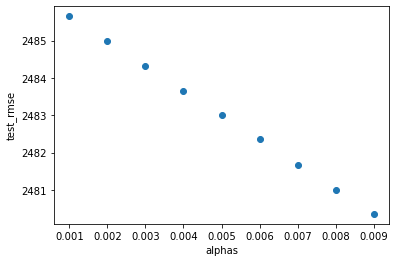

In [954]:
plt.scatter(alphas,test_rmse)
plt.xlabel("alphas")
plt.ylabel("test_rmse")

In [959]:
##Visualisations - Plotting pred. values vs actual values for linear, ridge and lasso regression models.

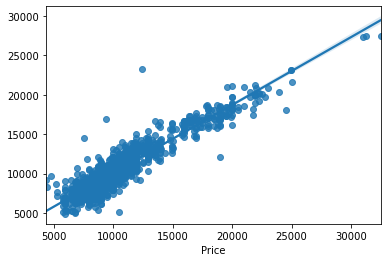

In [960]:
sns.regplot(train.Price,pred_RM)

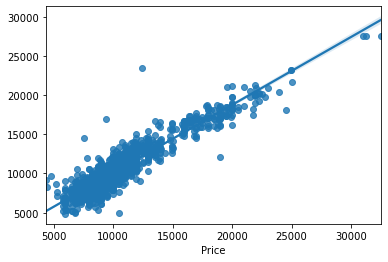

In [961]:
sns.regplot(train.Price,pred_LM)

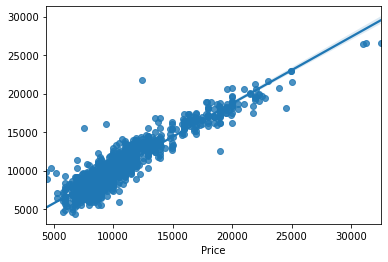

In [962]:
sns.regplot(train.Price,pred_reg)